**Dependencies: `ffmpeg`**. It's the swiss-army knife of command line video editing. I've installed it globally on my system. You should too! But you can also install to your python environment via `conda install ffmpeg-python` or `pip install ffmpeg-python`. 

In [1]:
import os
import glob
import subprocess
from pathlib import Path
import matplotlib.pyplot as plt

import numpy as np

This is the function I use to generate videos from matplotlib plots. It generates `t_max` many png images in a `directory` you specify. You need to give it a `plot_function`, which is basically a single plotting code put inside a function. You can choose the `filename`, `framerate`, `dpi`, whether the images are `transparent`, and whether you want to `r`e`m`ove `images`.

In [ ]:


def generate_video(plot_function,t_max,directory,framerate=20,dpi=300,
                   filename='out',rm_images=True,transparent=False):
    # generate images from plot_function
    if t_max >= 1e5:
        raise ValueError("t_max too large! Choose a smaller time index.")

    Path(directory).mkdir(exist_ok=True)
    for t in range(t_max):
        plot_function(t)
        plt.savefig(directory + "/%05d.png" % t, dpi=dpi, transparent=transparent)
        if t>0: plt.close()

    # record current directory. make figure directory if doesn't exist. cd into it.
    previous_directory = os.getcwd()
    os.makedirs(directory, exist_ok=True)
    os.chdir(directory)

    # create video via ffmpeg, removing intermediate images after if wanted (true by default)
    # then return to previous dir
    try:
        filename_=f"{filename}.mp4"
        subprocess.call(f'ffmpeg -y -loglevel warning -framerate {framerate} -pattern_type glob -i *.png -c:v libx264 -pix_fmt yuv420p -vf crop=trunc(iw/2)*2:trunc(ih/2)*2 {filename_}'.split(' '))
        if rm_images: 
            subprocess.call(['rm']+glob.glob("*.png"))
        print(f"created {filename_}")
    finally:
        os.chdir(previous_directory)


Let's generate a simple wave...

In [26]:
x = np.linspace(0, 2*np.pi, num=100)
data = np.array([np.sin(x-t) for t in range(1000)])
print(data.shape)

(1000, 100)


...and plot it. Note that I'm wrapping my plotting code in a function, so I can summon it later for different inputs.

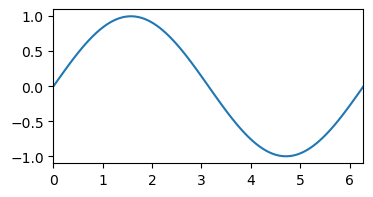

In [27]:
def plot_simple_1d(x,y):
    fig,ax = plt.subplots(1,1,figsize=(4,2))
    ax.plot(x,y)
    ax.set_xlim(x[0],x[-1])

# t=0 plot
plot_simple_1d(x, data[0,:])

Now we hand `generate_video` our plotting function as a function of t only. The easiest way to do this is to use a lambda function, defining it in place. I also specify the number of frames and the output directory.

created waveplot.mp4


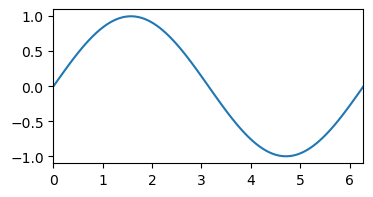

In [22]:
# generate video, as well as show the first frame of the video
generate_video(lambda t: plot_simple_1d(x, data[t,:]), 100, 'figs', filename='waveplot')

You didn't need a data array for this example, though that's usually what you have after machine learning. If you just have a function to plot, you can proceed like...

created waveplot2.mp4


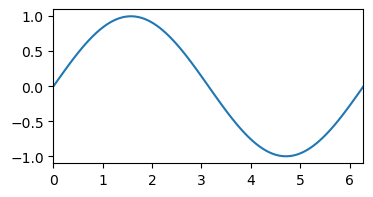

In [30]:
generate_video(lambda t: plot_simple_1d(x, np.sin(x-t)), 100, 'figs', filename='waveplot2')

In practice, I often move everything to .py files from Jupyter. Look then at [tools.py](https://github.com/shervinsahba/Tutorials/blob/main/video_from_plot/tools.py) and [video_from_plot.py](https://github.com/shervinsahba/Tutorials/blob/main/video_from_plot/video_from_plot.py) in this repository.